In [1]:
from fastai.vision.all import *

# Data

In [2]:
# Get data from Oxford-IIIT Pet dataset
path = untar_data(URLs.PETS)

In [3]:
# Review downloaded information
path.ls()

(#2) [Path('/Users/adgb/.fastai/data/oxford-iiit-pet/images'),Path('/Users/adgb/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
# Get files from images folder
files = get_image_files(path/'images')
len(files)

7390

In [5]:
# Exploring files
files[0],files[10]

(Path('/Users/adgb/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 Path('/Users/adgb/.fastai/data/oxford-iiit-pet/images/saint_bernard_139.jpg'))

# Single-label classification

## Using high-level API

### Two classes

Dog pictures have lower-case names while cats have upper-case names

In [6]:
# Labelling function to differentiate between dogs and cats
def is_cat(f): return 'cat' if f[0].isupper() else 'dog'

In [7]:
dls = ImageDataLoaders.from_name_func(
    path=path,  
    fnames=files,
    label_func=is_cat,
    item_tfms=Resize(224)
)

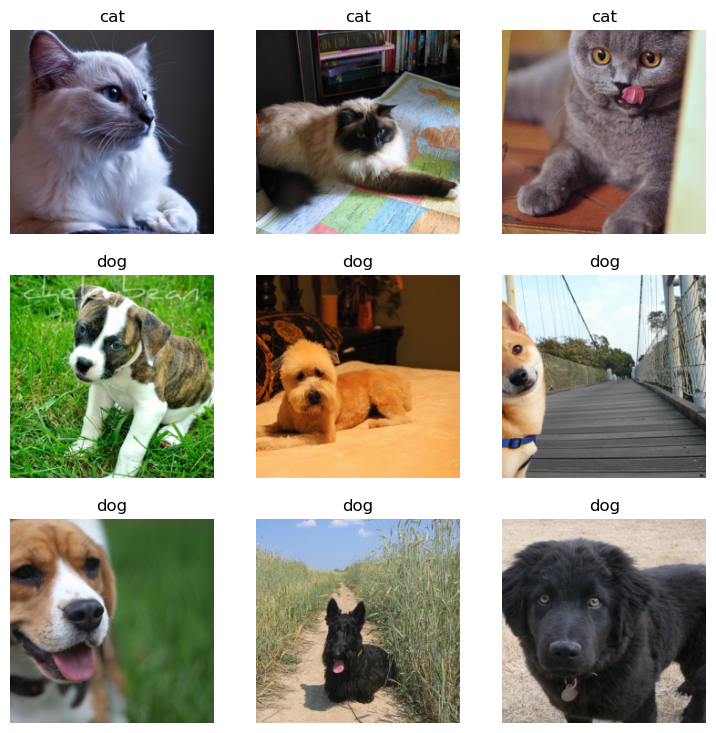

In [8]:
dls.show_batch()

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.171157,0.070900,0.020974,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.051993,0.025526,0.010825,00:55


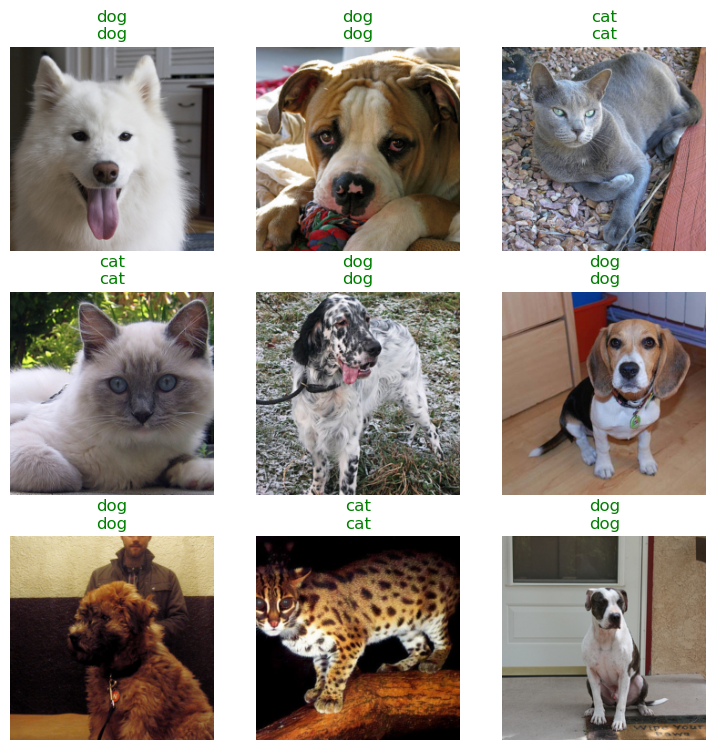

In [10]:
learn.show_results()

### Multiple Classes

In [11]:
# RegEx to extract breed
pat = r'^(.*)_\d+.jpg'

In [12]:
# Dataloaders to extract from breed name
dls = ImageDataLoaders.from_name_re(
    path=path,
    fnames=files,
    pat=pat,
    item_tfms=Resize(224)
)

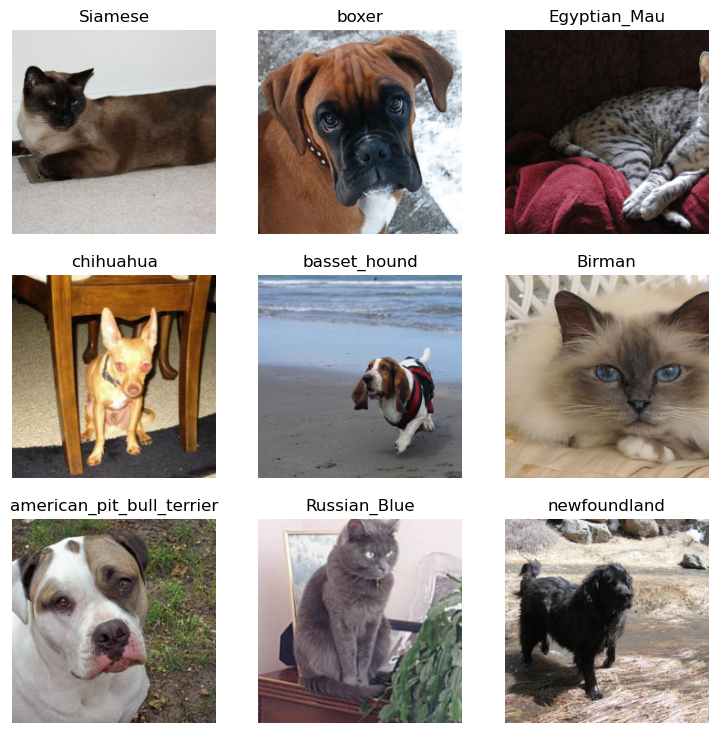

In [13]:
dls.show_batch()

In [54]:
# Use CPU as aug_transforms uses functions not yet implemented
# in MPS
default_device(use=0)

device(type='cpu')

In [55]:
# Updating data loader to include data augmentation to
# improve the classifier
dls = ImageDataLoaders.from_name_re(
    path=path,
    fnames=files,
    pat=pat,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

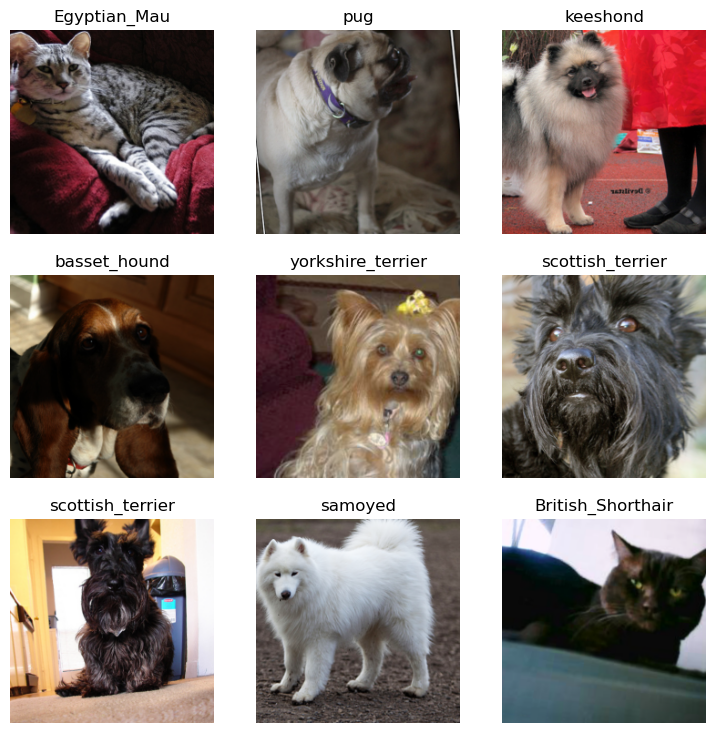

In [56]:
dls.show_batch()

In [57]:
# Return load to GPU
default_device(use=0)

device(type='cpu')

In [58]:
# Create a vision learner
learn = vision_learner(dls, resnet18, metrics=error_rate)

/opt/anaconda3/envs/fastai/lib/python3.12/site-packages/fastai/learner.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **t

SuggestedLRs(valley=0.0012022644514217973)

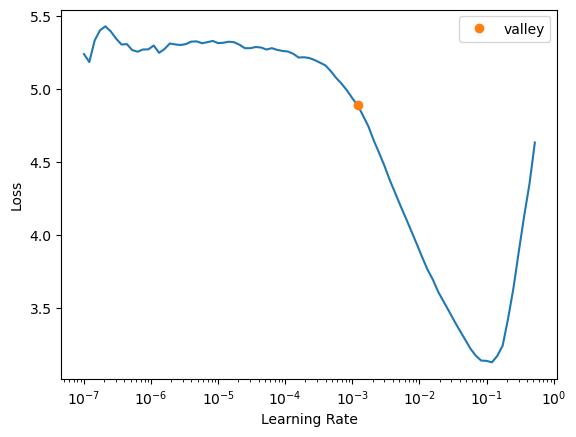

In [59]:
# Find the best possible leraning rate
learn.lr_find()